In [24]:
!pip install tensorflow

  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.7-py2.py3-none-any.whl.metadata (849 bytes)
  Using cached gast-0.5.4-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached termcolor-2.4.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached tensorboard-2.16.2-py3-none-any.whl.metadata (1.6 kB)
  Using cached keras-3.1.1-py3-none-any.whl.metadata (5.6 kB)
  Using cached namex-0.0.7-py3-none-any.whl.metadata (246 bytes)
     ---------------------------------------- 0.0/46.1 kB ? eta -:--:--
     ---------------------------------------- 46.1/46.1 kB 1.2 MB/s eta 0:00:00
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
   ----------------

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import os.path
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt
import seaborn as sns
import os


In [38]:
# Training Data Filepath
training_data_path = Path(os.path.join('data','Lung Disease Dataset','train'))
train_filepath_list = list(training_data_path.glob(r'**/*.jp*'))
train_class_list = list(map(lambda x : os.path.split(os.path.split(x)[0])[1], train_filepath_list))

# Validation Data Filepath
valdiation_data_path = Path(os.path.join('data','Lung Disease Dataset','val'))
valdiation_filepath_list = list(valdiation_data_path.glob(r'**/*.jp*'))
validation_class_list = list(map(lambda x : os.path.split(os.path.split(x)[0])[1], valdiation_filepath_list))

# Test Data Filepath
test_data_path = Path(os.path.join('data','Lung Disease Dataset','test'))
test_filepath_list = list(test_data_path.glob(r'**/*.jp*'))
test_class_list = list(map(lambda x : os.path.split(os.path.split(x)[0])[1], test_filepath_list))

In [39]:
final_df = pd.DataFrame(columns = ['filepath', 'class', 'type'])

train_df = [{'filepath': str(filepath), 'class': class_, 'type': 'train'} for filepath, class_, in zip(train_filepath_list, train_class_list)]
test_df = [{'filepath': str(filepath), 'class': class_, 'type': 'test'} for filepath, class_, in zip(test_filepath_list, test_class_list)]
valid_df = [{'filepath': str(filepath), 'class': class_, 'type': 'valid'} for filepath, class_, in zip(valdiation_filepath_list, validation_class_list)]

final_df = pd.concat([final_df, pd.DataFrame(train_df),pd.DataFrame(valid_df), pd.DataFrame(test_df) ])


In [40]:
final_df.head()

,filepath,class,type
0,data\Lung Disease Dataset\train\Bacterial Pneu...,Bacterial Pneumonia,train
1,data\Lung Disease Dataset\train\Bacterial Pneu...,Bacterial Pneumonia,train
2,data\Lung Disease Dataset\train\Bacterial Pneu...,Bacterial Pneumonia,train
3,data\Lung Disease Dataset\train\Bacterial Pneu...,Bacterial Pneumonia,train
4,data\Lung Disease Dataset\train\Bacterial Pneu...,Bacterial Pneumonia,train


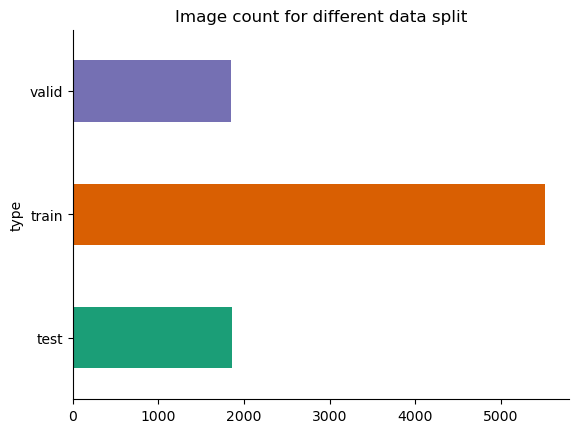

In [41]:
final_df.groupby('type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.title('Image count for different data split')
plt.gca().spines[['top', 'right',]].set_visible(False)

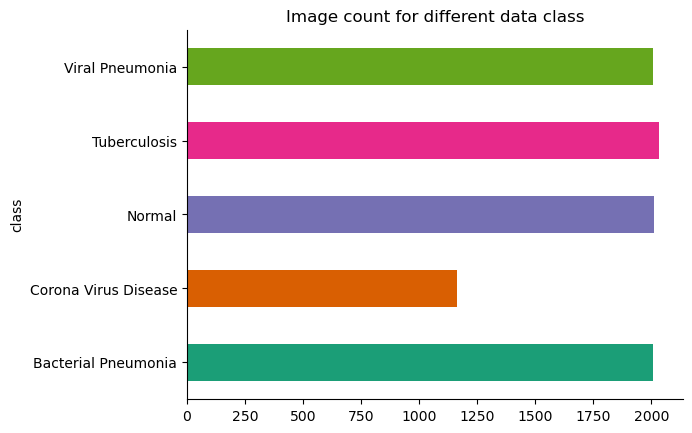

In [42]:
final_df.groupby('class').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.title('Image count for different data class')
plt.gca().spines[['top', 'right',]].set_visible(False)

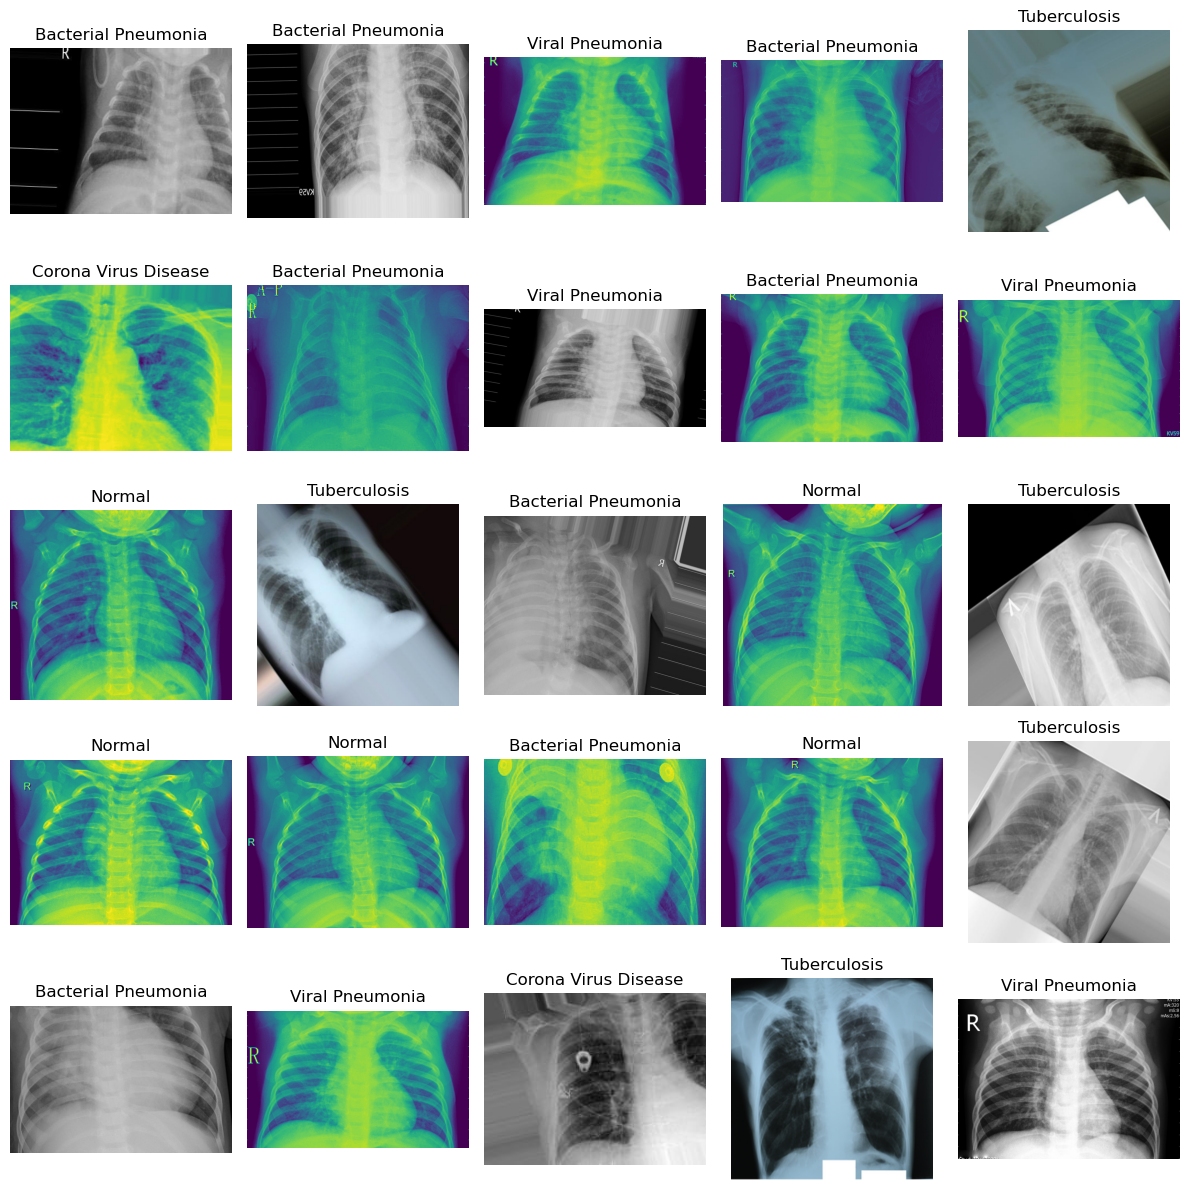

In [43]:
sample_df = final_df.sample(5 * 5, random_state=42)

# Create the figure and axes
fig, axes = plt.subplots(5, 5, figsize=(12, 12))

# Iterate over the axes and plot the images
for ax, img_path, title in zip(axes.flat, sample_df['filepath'], sample_df['class']):
    img = plt.imread(img_path)
    ax.imshow(img)
    ax.set_title(title)
    ax.axis('off')

# Show the figure
fig.tight_layout()
plt.show()

In [44]:
train_gen_instance = tf.keras.preprocessing.image.ImageDataGenerator(rescale= 1./255,
                             width_shift_range=0.2 ,
                             height_shift_range=0.2 ,
                             zoom_range=0.2)

val_gen_instance = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)

test_gen_instance = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)


In [45]:
# Training Data
train_df = final_df[final_df['type']== 'train'].drop('type', axis = 1)
train_images = train_gen_instance.flow_from_dataframe(dataframe = train_df,
                                           x_col = 'filepath',
                                           y_col = 'class',
                                           target_size = (224,224),
                                           batch_size = 32,
                                          color_mode="grayscale",
                                          class_mode='categorical')


# Validation Data
valid_df = final_df[final_df['type']== 'valid'].drop('type', axis = 1)
valid_images = val_gen_instance.flow_from_dataframe(dataframe = valid_df,
                                           x_col = 'filepath',
                                           y_col = 'class',
                                           target_size = (224,224),
                                           batch_size = 32,
                                          color_mode="grayscale",
                                          class_mode='categorical')

# Testing Data
test_df = final_df[final_df['type']== 'test'].drop('type', axis = 1)

test_images = test_gen_instance.flow_from_dataframe(dataframe = test_df,
                                           x_col = 'filepath',
                                           y_col = 'class',
                                           target_size = (224,224),
                                           batch_size = 32,
                                          color_mode="grayscale",
                                          class_mode='categorical')

Found 5515 validated image filenames belonging to 5 classes.
Found 1849 validated image filenames belonging to 5 classes.
Found 1863 validated image filenames belonging to 5 classes.


In [46]:
## VGG 19

vgg_19_base_model = tf.keras.applications.vgg19.VGG19(weights='imagenet',
                                               include_top=False,
                                                 input_shape=(224, 224, 3))

for current_layer in vgg_19_base_model.layers:
    current_layer.trainable = False


vgg_19_model = tf.keras.models.Sequential()
vgg_19_model.add(tf.keras.layers.Conv2D(3,
 (3,3), input_shape=(224,224,1),activation='relu',padding='same'))
vgg_19_model.add(vgg_19_base_model)
vgg_19_model.add(tf.keras.layers.Flatten())
vgg_19_model.add(tf.keras.layers.Dense(256, activation='relu'))
vgg_19_model.add(tf.keras.layers.Dropout(0.5))
vgg_19_model.add(tf.keras.layers.Dense(5, activation='softmax'))

# compile
vgg_19_model.compile('adam', loss = 'categorical_crossentropy',
               metrics = ['acc'])

C:\Users\Admin\OneDrive\anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(
